In [47]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
#pd.set_option('display.max_columns', None)
#T1_Data = pd.read_csv('E:\\Data_cjh\\BraTS2019\\test\\t1_radiomics_features.csv')E:\Data_cjh\BraTS2019\radimoic_feature\BraTS_2017

#'E:\\Data_cjh\\BraTS2019\\Feature_brats_2019\\WTandET\\WT\\WT_t1_features.csv'
#T1_Data = pd.read_csv('G:\\MediclImage\\Data\\NeckFibrosis\\new\\T1_C_PreRT_ok.csv')
Flair_Data = pd.read_csv('H:/Data_cjh/BraTS2019/radimoic_feature/peritumoral/Dataset/Dataset/17-ED-finished/flair_selected_Features.csv')

T1_Data = pd.read_csv('H:/Data_cjh/BraTS2019/radimoic_feature/peritumoral/Dataset/Dataset/17-ED-finished/t1_selected_Features.csv')

T1ce_Data = pd.read_csv('H:/Data_cjh/BraTS2019/radimoic_feature/peritumoral/Dataset/Dataset/17-ED-finished/t1ce_selected_Features.csv')

T2_Data = pd.read_csv('H:/Data_cjh/BraTS2019/radimoic_feature/peritumoral//Dataset/Dataset/17-ED-finished/t2_selected_Features.csv')

Flair_Data = shuffle(Flair_Data,random_state = 1234)
T1_Data = shuffle(T1_Data,random_state = 1234)
T1ce_Data = shuffle(T1ce_Data,random_state = 1234)
T2_Data = shuffle(T2_Data,random_state = 1234)

Flair_Data.columns = ["{}_flair".format(Flair_Data.columns[i]) for i in range(len(Flair_Data.columns))]
T1_Data.columns = ["{}_t1".format(T1_Data.columns[i]) for i in range(len(T1_Data.columns))]
T1ce_Data.columns = ["{}_t1ce".format(T1ce_Data.columns[i]) for i in range(len(T1ce_Data.columns))]
T2_Data.columns = ["{}_t2".format(T2_Data.columns[i]) for i in range(len(T2_Data.columns))]

Multi_Data = pd.concat([Flair_Data,T1_Data,T1ce_Data,T2_Data],axis=1,verify_integrity=False)
Multi_Data.head(2)

,label_flair,original_shape_Elongation_flair,original_shape_Flatness_flair,original_shape_LeastAxisLength_flair,original_shape_MajorAxisLength_flair,original_shape_Maximum2DDiameterColumn_flair,original_shape_Maximum2DDiameterRow_flair,original_shape_Maximum2DDiameterSlice_flair,original_shape_Maximum3DDiameter_flair,original_shape_MeshVolume_flair,...,exponential_glszm_SmallAreaHighGrayLevelEmphasis_t2,exponential_glszm_SmallAreaLowGrayLevelEmphasis_t2,exponential_glszm_ZoneEntropy_t2,exponential_glszm_ZonePercentage_t2,exponential_glszm_ZoneVariance_t2,exponential_ngtdm_Busyness_t2,exponential_ngtdm_Coarseness_t2,exponential_ngtdm_Complexity_t2,exponential_ngtdm_Contrast_t2,exponential_ngtdm_Strength_t2
0,1,0.963943,0.705955,43.311174,61.351145,72.449983,95.015788,85.586214,95.963535,52824.00000,...,2.922060,0.254117,4.887784,0.002771,7.763001e+06,134.634253,0.000290,16.490983,0.001646,0.077194
1,1,0.832035,0.509359,40.699397,79.903116,78.924014,79.378838,77.794601,83.318665,73177.83333,...,5.065441,0.209623,5.045165,0.001858,1.102532e+07,241.479082,0.000204,9.259663,0.009020,0.010283


In [48]:
X_Flair = Flair_Data.drop(['label_flair'], axis=1)
Y_Flair = Flair_Data.loc[:,['label_flair']]
X_T1ce = T1ce_Data.drop(['label_t1ce'], axis=1)
Y_T1ce = T1ce_Data.loc[:,['label_t1ce']]
                         
X_T2 = T2_Data.drop(['label_t2'], axis=1)
Y_T2 = T2_Data.loc[:,['label_t2']]
X_T1 = T1_Data.drop(['label_t1'], axis=1)
Y_T1 = T1_Data.loc[:,['label_t1']]


In [49]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
#scaler = MinMaxScaler(feature_range=(0, 1))
X_Flair_data = scaler.fit_transform(X_Flair)
X_T1ce_data = scaler.fit_transform(X_T1ce)
X_T2_data = scaler.fit_transform(X_T2)
X_T1_data = scaler.fit_transform(X_T1)

class_labels = LabelEncoder()

Y_data = class_labels.fit_transform(Y_Flair.values.ravel())

X_Flair_data.shape,Y_data

((284, 2153),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [50]:
from sklearn.feature_selection import VarianceThreshold 
def variance_threshold_selector(data, threshold=0.009):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [51]:
from sklearn.linear_model import LassoCV, LassoLars, LassoLarsIC,Lasso,ARDRegression,RidgeCV,ElasticNetCV

def feacture_selection(X_train,Y_train):
    #regr = ElasticNetCV(l1_ratio=1,max_iter=10000, n_alphas=100,cv=10,normalize =True, random_state=1003,n_jobs=4,tol=0.00001).fit(X_train, Y_train)
    regr = ElasticNetCV(l1_ratio=1,cv=5,normalize =True, random_state=1003,n_jobs=4).fit(X_train, Y_train)
    #regr = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
    reg = regr.coef_
    columns = X_train.columns
    feature_columns = []
    feature_corff = []
    indexs = []
    for index in range(X_train.columns.shape[0]):
        if reg[index] != 0.0:
            feature_columns.append(columns[index])
            feature_corff.append(reg[index])
    return feature_columns

In [57]:
import mifs
def mRMR_feature_select(X_train,Y_train,mRMR_feature_num=30):
   
    print("mRMR feature start...")
    feat_selector = mifs.MutualInformationFeatureSelector('MRMR', n_features=mRMR_feature_num,n_jobs=3, verbose=0)
    feat_selector.fit(X_train, Y_train)
    print("mRMR feature end...")
    feature_mifs = X_train.columns[feat_selector.ranking_].tolist()
    print(" the mRMR select number of features is ",len(feature_mifs), feature_mifs)
    return feature_mifs

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score
def evalution_metirc(y_test,y_pred_1,y_pred,labels,target_names):
    
    auc = roc_auc_score(y_test, y_pred_1)
    print('ROC AUC: %f' % auc)
#     模型评估之混淆矩阵
    confusion = confusion_matrix(y_test, y_pred)

    if float(np.sum(confusion)) != 0:
        accuracy = float(confusion[0, 0] + confusion[1, 1]) / float(np.sum(confusion))
    #print("Global Accuracy: " + str(accuracy))
    specificity = 0
    if float(confusion[0, 0] + confusion[0, 1]) != 0:
        specificity = float(confusion[0, 0]) / float(confusion[0, 0] + confusion[0, 1])
    #print("Specificity: " + str(specificity))
    sensitivity = 0
    if float(confusion[1, 1] + confusion[1, 0]) != 0:
        sensitivity = float(confusion[1, 1]) / float(confusion[1, 1] + confusion[1, 0])
    #print("Sensitivity: " + str(sensitivity))
    # make predictions for test data and evaluate

    print(confusion)
    print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))
    F1_score = f1_score(y_test, y_pred, labels=labels, pos_label=1)
    return auc,accuracy,specificity,sensitivity,F1_score


In [54]:
from imblearn.over_sampling import SMOTE
def smote_augment_data(X_train,y_train):
    x_columns = X_train.columns
    y_columns = y_train.columns
    #注意过采样时 只对训练集进行过采样
    oversampler=SMOTE(random_state=0)
    x_smote_train,y_smote_train=oversampler.fit_sample(X_train,y_train)
    x_smote_train = pd.DataFrame(x_smote_train, columns=x_columns)
    y_smote_train = pd.DataFrame(y_smote_train, columns=y_columns)
    return x_smote_train,y_smote_train
    

In [55]:
from sklearn.model_selection import GridSearchCV
def grid_search_cv(model,param_grid,X,Y):
    grid_search = GridSearchCV(model,param_grid,n_jobs=2,verbose=1,cv=5)
    grid_search.fit(X,Y)
    return grid_search.best_estimator_.get_params()


begin to select features


D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008227016542209586, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012720670097459585, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005411326148956785, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0058251633136428005, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01341424707066552, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014153358789153525, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006527876136504629, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004063189361072278, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016187258335839477, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01072541620824738, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01583285055650821, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003858817106851757, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004396067557222855, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010855778018047282, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036205841262353378, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005415342622649866, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023967631359135266, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008263458262902201, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044581109795263085, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009315467976028446, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004989338617833017, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009526573241443959, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007400631231893967, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004859499949039739, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007249610781834087, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00667585289446343, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008418386833863263, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00407845100630546, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010609564022735166, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003722356048786419, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002991297082394862, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028236916644642056, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013630998763595414, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023112145486440916, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006544901544185411, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012916413190593001, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008508235434296907, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03459827007457672, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02237825999827292, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02044736015316695, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012788531078802567, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024346984260994298, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025369124002320664, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012246428795777836, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011889291949039163, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015888333407345107, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004691681569714376, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00407896593711532, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033996929421949706, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00345216673362532, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004297110887041988, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006627581946302863, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005814041058114228, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01419394239084093, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004916383445077166, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007350899473008321, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008145284489619653, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010802701379716395, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008245340438140486, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012130306386759437, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01471059237911368, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005304951680329406, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025783893507158595, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004228981073909621, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018381218537348865, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  17 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHL_gldm_DependenceVariance_t2', 'wavelet-HLH_firstorder_Skewness_t2', 'wavelet-LLL_glszm_GrayLevelNonUniformity_t2', 'lbp-2D_firstorder_10Percentile_t2', 'lbp-3D-m1_firstorder_Skewness_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_ngtdm_Coarseness_t2', 'square_glszm_ZonePercentage_t2', 'squareroot_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_firstorder_Minimum_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  75 
 ['original_shape_Flatness_t1ce', 'original_shape_Maximum2DDiameterRow_t1ce', 'original_shape_MinorAxisLength_t1ce', 'log-sigma-1-0-mm-3D_firstorder

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mRMR feature end...
 the mRMR select number of features is  20 ['lbp-3D-m1_firstorder_RootMeanSquared_t1ce', 'square_glszm_SmallAreaEmphasis_t1ce', 'wavelet-HLL_firstorder_Kurtosis_t1ce', 'lbp-3D-m1_firstorder_Skewness_t2', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair', 'lbp-2D_firstorder_Mean_t1ce', 'wavelet-LHL_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'squareroot_glszm_LowGrayLevelZoneEmphasis_t1ce', 'wavelet-LLH_glcm_MCC_t1ce', 'wavelet-HLL_firstorder_Median_t1ce', 'wavelet-LLH_firstorder_Skewness_t2', 'original_firstorder_Skewness_t1ce', 'exponential_firstorder_10Percentile_t2', 'wavelet-HLH_glcm_Correlation_t1ce', 'lbp-3D-m2_firstorder_Mean_t2', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t1ce', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis_t1ce']
ROC AUC: 0.986023
[[ 56   2]
 [  9 160]]
              precision    recall  f1-score   suppor

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016755463751570776, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0058192944732271545, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01905285891177333, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0198266594932075, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012402980118181306, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01843310122633446, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02030847355965576, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011542564279972467, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013168300637979191, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011255297100058612, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013609722231002402, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012823541050462045, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001983132283325695, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002559597737469721, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030972758783044396, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004040690522067791, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008125513277062124, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004694425366366106, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008626848128082898, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010927641871632643, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010728357999275462, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013004619508126314, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004954266696318821, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00520803235291778, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003761697436697367, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009181421142325119, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0071600804067934246, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004083216729504208, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024812206876359613, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024335825117148963, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004078117955125471, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00733483635173382, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02032045263328852, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02699215527173393, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00761091994275731, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010436938840608811, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00846112543340033, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012046777733616565, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028130807546834224, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006880453514133675, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010086761406431083, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012448518913899254, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012918030334954592, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018264366705955597, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01859683127257898, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005139183977231232, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010550203591146001, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008965255451824916, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01218716483701987, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013817116257645923, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01243132186930651, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005701283560757275, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014261091045600027, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013306938260936152, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005934099355090927, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015172912860633797, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009063000598455134, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033751465826174776, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032722083370057276, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035811868097885835, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

the number of feature_flair is  2 
 ['wavelet-LHH_gldm_LargeDependenceEmphasis_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  13 
 ['log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHH_glrlm_RunPercentage_t2', 'wavelet-HLH_firstorder_Kurtosis_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_glszm_HighGrayLevelZoneEmphasis_t2', 'lbp-3D-k_glszm_SmallAreaLowGrayLevelEmphasis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_glrlm_RunLengthNonUniformityNormalized_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  14 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-L

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009371935382996854, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006732146808800854, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011157466760653767, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008096889622284165, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011794152395700697, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016466498260898965, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009832085436641491, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0119185198817221, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006077698919321112, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010382326036655218, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008499868784215332, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006322483626108245, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034060907033781618, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003601320710861153, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028643053908225247, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00537056755858123, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005081098354673075, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003934295186624692, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005610740109938339, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007740314503660861, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0059704463388821905, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005697359060013951, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003812237677464969, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005929271742788643, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035971064170146685, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00288064005309243, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002417235368184851, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003666933494481217, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00913081980542374, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009035692893061942, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010610936238715507, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011146087639593849, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00492325703447799, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0063505326307699145, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008599601428134374, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006581519180366341, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005295188916875755, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01236713578185103, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007976726171883039, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017135553758740318, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001858541297747568, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002500937090079612, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008117585386949955, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010494704638664532, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008999202312353183, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005363076736493999, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0157546823333079, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007153610064844301, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006308001688303977, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007659259782057143, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008108397639288958, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024955284672649736, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036981158545174864, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040427104462236185, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

the number of feature_flair is  2 
 ['square_gldm_DependenceVariance_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  61 
 ['original_shape_Flatness_t2', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-1-0-mm-3D_glcm_Imc1_t2', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-2-0-mm-3D_glszm_SmallAreaEmphasis_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'log-sigma-5-0-mm-3D_glcm_Idn_t2', 'log-sigma-5-0-mm-3D_glcm_Imc1_t2', 'wavelet-LLH_firstorder_Maximum_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'wavelet-LHL_firstorder_Median_t2', 'wavelet-LHL_glcm_Imc1_t2', 'wavelet-LHL_glcm_MCC_t2', 'wavelet-LHL_gldm_LargeDependenceHighGrayLevelEmphasis_t2', 'wavelet-LHL_glszm_LargeAreaEmphasis_t2', 'wavelet-LHL_glszm_ZoneVariance_t2', 'wavele

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00998828699866161, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01497898634552175, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017118268045744456, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008722062267396358, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0245329916466292, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018661625079665622, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010002561951291233, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010883053228494755, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015091105859819487, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021174482985979515, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01644979867621405, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015864094444058258, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014653773797552797, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001678659303590152, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001486964111504313, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008475027170008365, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00676649695102427, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007253701893310982, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005971773235095457, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007012507873912027, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012211357177872029, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011406420249684024, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007613547319429065, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011204740800535448, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011941416222643844, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006027310873582922, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01863025888204952, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028628229033897737, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031526859008669424, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014364908015303934, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009593171811786538, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009753991593374034, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006417063045894483, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012171830917485249, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006879863721628354, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038450593142364264, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00983178475352045, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008513467334121547, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005751453383927699, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001567534801484971, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002034609172091084, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022823731880493026, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002699324122495614, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number o

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004776798090218803, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007305885633085651, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0062387113923390025, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015839921578738758, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011314436088035063, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00937507228073381, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00935574962239595, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004274177752680686, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004958498035486869, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002674638945048626, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024899174473404784, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  5 
 ['log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  1 
 ['lbp-3D-m1_firstorder_90Percentile_t1']
the number of feature_t1ce is  23 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LLH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idmn_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHL_glszm_SizeZoneNonUniformity_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-H

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005689521950323906, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016999670893209418, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004601656644514174, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013126863274122602, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015152878651872176, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018116389215858952, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015347380756369017, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00936668713489526, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015262436982252235, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006804849861677953, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012076323397231248, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009426157846375155, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014290612989144025, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016260771118604828, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018362707846966142, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0043367504250451105, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005110157570490825, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003921221370237815, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005329019930983114, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0068257671753608196, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008796552779412714, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006663945930480253, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01672763320838483, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008727338703455947, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013470027956063751, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005729176610499619, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001640096089970955, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025957657304556576, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030225083502470954, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029398967960284905, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005533604153805216, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009373324887725465, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006704689187514212, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006921272918298138, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011192951222676495, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015934869609227298, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008544842806377795, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01442616317766543, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.033574896685322986, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018109490055465, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014261114953779547, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006034796407664328, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010982074637313446, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007747490262520515, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012526787664690904, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003084165107837971, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029397360320375793, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035239613267531375, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030929772806707945, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007161374310310942, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01720140677268356, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02121225994918885, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013061904071987873, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012816395683620474, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005120670452441689, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011467432227080798, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017263358130016254, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01389962694481725, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005517119771904749, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011856169526249877, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004416855002360651, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005462886371726143, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053610769297919095, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  6 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_glcm_InverseVariance_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  36 
 ['original_shape_Flatness_t1ce', 'log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-LHH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-HLL_firstorder_Kurtosis_t1ce',

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0389811004940952, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0058251633136428005, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005411326148956785, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004428632986044789, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014153358789153525, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014588679651045933, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019829767712629814, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035758406107496143, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016187258335839477, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016322645126242777, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00671012134428146, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005103627841341267, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002381624936868554, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036205841262353378, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005415342622649866, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004487135986610324, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008263458262902201, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044581109795263085, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006466605241770784, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00575456694249149, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011428297530839376, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006440968405945824, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007612624495704989, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005267262437320626, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00416956603091144, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004266673530058204, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00407845100630546, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025479694564582607, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003073823083176405, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034667894309074535, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010673929373766988, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02271044567854741, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037270285879258402, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02622919351172781, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011583370240631163, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013560874872112105, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028002664276380818, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011314162072666778, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0280715602322682, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020556069662211296, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020554033138113714, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01422831551120797, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011475601755448123, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014032405105551399, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004690202301429948, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036182154750990653, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002970075850607712, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035982952101405313, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005998336428350459, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005196974884578154, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005968974652449388, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01419394239084093, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007895806929412719, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005514105887617582, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008843722929789244, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008245340438140486, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006343630482288046, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005304951680329406, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008368835891760587, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011493522091710937, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003341690976697953, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026723859974309705, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002191367607678539, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  17 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHL_gldm_DependenceVariance_t2', 'wavelet-HLH_firstorder_Skewness_t2', 'wavelet-LLL_glszm_GrayLevelNonUniformity_t2', 'lbp-2D_firstorder_10Percentile_t2', 'lbp-3D-m1_firstorder_Skewness_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_ngtdm_Coarseness_t2', 'square_glszm_ZonePercentage_t2', 'squareroot_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_firstorder_Minimum_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  75 
 ['original_shape_Flatness_t1ce', 'original_shape_Maximum2DDiameterRow_t1ce', 'original_shape_MinorAxisLength_t1ce', 'log-sigma-1-0-mm-3D_firstorder

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:80: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ROC AUC: 1.000000
[[ 58   0]
 [  0 169]]
              precision    recall  f1-score   support

         LGG       1.00      1.00      1.00        58
         HGG       1.00      1.00      1.00       169

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227

ROC AUC: 0.962652
[[14  2]
 [ 1 40]]
              precision    recall  f1-score   support

         LGG       0.93      0.88      0.90        16
         HGG       0.95      0.98      0.96        41

    accuracy                           0.95        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.95      0.95      0.95        57

begin to select features


D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004193422079065812, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007626682975617527, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018100591833049684, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006984211545558505, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006666005171019229, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02010116005140994, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007035981078201747, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012866324101272725, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011542564279972467, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01617316762258464, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012066639917047761, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010690173934573166, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010195481051048068, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012823541050462045, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040533004569786035, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014318478990843486, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015194580369581323, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035355342290661618, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004694425366366106, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007650265230603415, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01842290989659945, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008006097807295776, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010427268024892244, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008567458234303715, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01264013516592305, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00520803235291778, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009918403431688531, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01057886536469714, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003761697436697367, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002684659735702734, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025451042839001667, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017966046424267058, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004689815414845366, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007194850173091405, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005406819382275163, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008831116655673932, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010436938840608811, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007982822830013503, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028130807546834224, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008536898887228667, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012046777733616565, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021407940656392233, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012448518913899254, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00670077678441347, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012918030334954592, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018264366705955597, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01859683127257898, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010550203591146001, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006696231393432006, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005139183977231232, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013817116257645923, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008855228248896507, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01218716483701987, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005701283560757275, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010220912147629047, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014261091045600027, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011344056306827499, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009483235101698767, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009063000598455134, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033751465826174776, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032722083370057276, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035811868097885835, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

the number of feature_flair is  2 
 ['wavelet-LHH_gldm_LargeDependenceEmphasis_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  13 
 ['log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHH_glrlm_RunPercentage_t2', 'wavelet-HLH_firstorder_Kurtosis_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_glszm_HighGrayLevelZoneEmphasis_t2', 'lbp-3D-k_glszm_SmallAreaLowGrayLevelEmphasis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_glrlm_RunLengthNonUniformityNormalized_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  14 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-L

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:80: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ROC AUC: 1.000000
[[ 59   0]
 [  0 168]]
              precision    recall  f1-score   support

         LGG       1.00      1.00      1.00        59
         HGG       1.00      1.00      1.00       168

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227

ROC AUC: 0.965873
[[12  3]
 [ 1 41]]
              precision    recall  f1-score   support

         LGG       0.92      0.80      0.86        15
         HGG       0.93      0.98      0.95        42

    accuracy                           0.93        57
   macro avg       0.93      0.89      0.91        57
weighted avg       0.93      0.93      0.93        57

begin to select features


D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007913420524993775, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005768018614791703, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016219030721711825, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007518777248703312, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00933368016523961, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01237689773105105, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006946604079433039, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008507918137301451, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009088119003008821, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008444777796658864, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011419182469105893, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007904612960549909, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015895755061308137, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018085843397760412, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004463540136888329, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004339436242105907, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004537040216717816, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00503898255280949, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004931600423014326, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004535978988127298, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007682009103411075, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005815625952967085, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005549707159867023, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006550469368810041, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035893038432261055, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006904945201899763, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014501810896288436, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004791082690157378, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004636506628147963, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018317302571052685, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011187304640599915, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00733341778669705, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01356777192275993, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016214294647861727, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00492325703447799, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0063505326307699145, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009390795323977102, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01184546002541187, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01206188511506788, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009850531525511602, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004991933180248338, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003089387805646021, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030994692818008783, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number o

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004284459969317617, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007113703097591628, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007387765316758554, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01492365433564996, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00346004504447206, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007782661761715506, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005222866100590209, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009748769369042495, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009945601571697632, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005940305230905149, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005998389018268477, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006109949878336206, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

the number of feature_flair is  2 
 ['square_gldm_DependenceVariance_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  61 
 ['original_shape_Flatness_t2', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-1-0-mm-3D_glcm_Imc1_t2', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-2-0-mm-3D_glszm_SmallAreaEmphasis_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'log-sigma-5-0-mm-3D_glcm_Idn_t2', 'log-sigma-5-0-mm-3D_glcm_Imc1_t2', 'wavelet-LLH_firstorder_Maximum_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'wavelet-LHL_firstorder_Median_t2', 'wavelet-LHL_glcm_Imc1_t2', 'wavelet-LHL_glcm_MCC_t2', 'wavelet-LHL_gldm_LargeDependenceHighGrayLevelEmphasis_t2', 'wavelet-LHL_glszm_LargeAreaEmphasis_t2', 'wavelet-LHL_glszm_ZoneVariance_t2', 'wavele

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:80: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ROC AUC: 1.000000
[[ 59   0]
 [  0 168]]
              precision    recall  f1-score   support

         LGG       1.00      1.00      1.00        59
         HGG       1.00      1.00      1.00       168

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227

ROC AUC: 0.869048
[[ 7  8]
 [ 4 38]]
              precision    recall  f1-score   support

         LGG       0.64      0.47      0.54        15
         HGG       0.83      0.90      0.86        42

    accuracy                           0.79        57
   macro avg       0.73      0.69      0.70        57
weighted avg       0.78      0.79      0.78        57

begin to select features


D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006044929777946351, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005149428907062159, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017915302229146057, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01497898634552175, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015904275129265344, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02305118290752839, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02271605371248886, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018661625079665622, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010194592080103745, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01321252702181086, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010883053228494755, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01670216740792982, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015463488210719148, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01581715852095608, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001486964111504313, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007727485554455349, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016037733797334863, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010399562181716115, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008475027170008365, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008433070873261589, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013378626234437474, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007012507873912027, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011406420249684024, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011891886379954392, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007613547319429065, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012694611737599906, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01863025888204952, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011941416222643844, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031526859008669424, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007081262439774694, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number o

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014364908015303934, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009593171811786538, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009246615713228379, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02102690174385266, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006974786734139149, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007730759214498811, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013140197891189705, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008861646316026137, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004114679501398655, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0041667579354540685, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002230404419392429, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002498805741348864, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01019336063408982, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00935284725924923, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011681995194073203, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00873443980089017, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01086919225485733, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007198925349168217, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006792093255667375, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010000501848123455, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01336504414265452, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011101041585855731, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004838919748576254, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005490206210437901, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  5 
 ['log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  1 
 ['lbp-3D-m1_firstorder_90Percentile_t1']
the number of feature_t1ce is  23 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LLH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idmn_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHL_glszm_SizeZoneNonUniformity_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-H

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:80: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ROC AUC: 1.000000
[[ 60   0]
 [  0 167]]
              precision    recall  f1-score   support

         LGG       1.00      1.00      1.00        60
         HGG       1.00      1.00      1.00       167

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227

ROC AUC: 0.904485
[[11  3]
 [ 2 41]]
              precision    recall  f1-score   support

         LGG       0.85      0.79      0.81        14
         HGG       0.93      0.95      0.94        43

    accuracy                           0.91        57
   macro avg       0.89      0.87      0.88        57
weighted avg       0.91      0.91      0.91        57

begin to select features


D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008145686509249295, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004169652742338492, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0043630300343785455, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017333622995264863, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0057954802432040875, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0114238849912148, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013132739959768602, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01607194385059546, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00880749689034497, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009190821779965913, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014989752793254221, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0066211773204520735, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0075363602848430855, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011127806607031145, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019832076401953835, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016533094207789936, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019266061991346506, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005511945979310873, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010296888610124344, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01589719952916835, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01105371163871266, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006223432693139186, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007527865502150566, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006425397567055319, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0051793644303623765, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0069227689972082285, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011182640002944333, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001480846754902898, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008893233804096245, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029426121479192366, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016793091036317771, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010684524419528607, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009373324887725465, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006704689187514212, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011192951222676495, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024155526488035317, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015934869609227298, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016827928568127815, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010538042276763304, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025405528279265344, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0045569372377442935, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013203686721134117, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012439818459746121, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012526787664690904, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008471493871720331, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01260761164978006, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035239613267531375, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00436825267008345, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01720140677268356, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007161374310310942, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030929772806707945, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012816395683620474, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009416876342055736, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015572946721375103, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017263358130016254, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011467432227080798, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01529272686375896, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011856169526249877, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009097768491081293, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013828979333363689, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019716616859910274, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002369996980295608, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028403047970703005, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  6 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_glcm_InverseVariance_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  36 
 ['original_shape_Flatness_t1ce', 'log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-LHH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-HLL_firstorder_Kurtosis_t1ce',

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:80: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ROC AUC: 1.000000
[[ 60   0]
 [  0 168]]
              precision    recall  f1-score   support

         LGG       1.00      1.00      1.00        60
         HGG       1.00      1.00      1.00       168

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

ROC AUC: 0.954082
[[13  1]
 [ 5 37]]
              precision    recall  f1-score   support

         LGG       0.72      0.93      0.81        14
         HGG       0.97      0.88      0.93        42

    accuracy                           0.89        56
   macro avg       0.85      0.90      0.87        56
weighted avg       0.91      0.89      0.90        56

begin to select features


D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008227016542209586, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012720670097459585, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0108710086788526, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0058251633136428005, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01341424707066552, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014153358789153525, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004063189361072278, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018727272916873178, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01072541620824738, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00617659385150969, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019122215610506033, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004396067557222855, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036651534855703244, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008080482360532881, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036205841262353378, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005415342622649866, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023967631359135266, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044581109795263085, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011163337302591225, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009315467976028446, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004396780034838954, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009526573241443959, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004989338617833017, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007249610781834087, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006459732727494991, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00667585289446343, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010757877434435507, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00407845100630546, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01076361369778396, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002991297082394862, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028236916644642056, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025479694564582607, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037270285879258402, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00871180067578825, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023112145486440916, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012916413190593001, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03459827007457672, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027438599083114745, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02044736015316695, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023782470564810365, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008705304637527445, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022632871558864537, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015183128911286287, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012644227950191822, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014032405105551399, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004448206893253419, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009662353091924952, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031360767677869605, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036182154750990653, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002970075850607712, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007098395818799119, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00490211235439042, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005998336428350459, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022046671911135962, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012222177628733621, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007895806929412719, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006707907509652999, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00533839719010247, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0094544293274752, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006272316069102904, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00709740059430948, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012230390177686262, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004705390290961758, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002613293863729216, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005236039961044811, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  17 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHL_gldm_DependenceVariance_t2', 'wavelet-HLH_firstorder_Skewness_t2', 'wavelet-LLL_glszm_GrayLevelNonUniformity_t2', 'lbp-2D_firstorder_10Percentile_t2', 'lbp-3D-m1_firstorder_Skewness_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_ngtdm_Coarseness_t2', 'square_glszm_ZonePercentage_t2', 'squareroot_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_firstorder_Minimum_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  75 
 ['original_shape_Flatness_t1ce', 'original_shape_Maximum2DDiameterRow_t1ce', 'original_shape_MinorAxisLength_t1ce', 'log-sigma-1-0-mm-3D_firstorder

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mRMR feature end...
 the mRMR select number of features is  20 ['lbp-3D-m1_firstorder_RootMeanSquared_t1ce', 'square_glszm_SmallAreaEmphasis_t1ce', 'wavelet-HLL_firstorder_Kurtosis_t1ce', 'lbp-3D-m1_firstorder_Skewness_t2', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair', 'lbp-2D_firstorder_Mean_t1ce', 'wavelet-LHL_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'squareroot_glszm_LowGrayLevelZoneEmphasis_t1ce', 'wavelet-LLH_glcm_MCC_t1ce', 'wavelet-HLL_firstorder_Median_t1ce', 'wavelet-LLH_firstorder_Skewness_t2', 'original_firstorder_Skewness_t1ce', 'exponential_firstorder_10Percentile_t2', 'wavelet-HLH_glcm_Correlation_t1ce', 'lbp-3D-m2_firstorder_Mean_t2', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t1ce', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis_t1ce']
ROC AUC: 0.983983
[[ 56   2]
 [  8 161]]
              precision    recall  f1-score   suppor

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0058192944732271545, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02160013836707675, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01905285891177333, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008545301386802873, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0198266594932075, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012402980118181306, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011534941704181068, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011609753353175989, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013204627499252886, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01232659963261748, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013609722231002402, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010690173934573166, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001983132283325695, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002559597737469721, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030972758783044396, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004040690522067791, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004694425366366106, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035355342290661618, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010728357999275462, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010427268024892244, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008626848128082898, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004097799567486099, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004441444771288633, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007978452279158305, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003711059862754419, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009236691046718998, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00959662086394679, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024812206876359613, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024335825117148963, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003484719988476978, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00733483635173382, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02032045263328852, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007194850173091405, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006781777210532525, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02699215527173393, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007982822830013503, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011888822666183907, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025823422146296737, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019633308412742523, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012037235239571162, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021407940656392233, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00670077678441347, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012918030334954592, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018264366705955597, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01859683127257898, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010550203591146001, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009384528936216219, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006696231393432006, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006683828208464915, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012659838359067255, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013817116257645923, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01320277673986009, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01082725163703091, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007937473361311148, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006856404292219259, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009063000598455134, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008213125010502587, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001564499179942072, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002227983939197667, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033751465826174776, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

the number of feature_flair is  2 
 ['wavelet-LHH_gldm_LargeDependenceEmphasis_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  13 
 ['log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHH_glrlm_RunPercentage_t2', 'wavelet-HLH_firstorder_Kurtosis_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_glszm_HighGrayLevelZoneEmphasis_t2', 'lbp-3D-k_glszm_SmallAreaLowGrayLevelEmphasis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_glrlm_RunLengthNonUniformityNormalized_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  14 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-L

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009371935382996854, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016219030721711825, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00891415652656291, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008096889622284165, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012041673368868522, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005922337697984115, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008611599260635844, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009546749609940564, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008000181265209155, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02041059927300254, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006322483626108245, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009539383713247168, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003601320710861153, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028643053908225247, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003649435261477596, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005081098354673075, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044823423855132605, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003934295186624692, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0059704463388821905, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008595596687040269, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007682009103411075, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004600716831978463, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003812237677464969, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004300376457618809, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019228657599689308, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017579267679243074, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006862911789215609, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00544835206353933, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009035692893061942, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007800407852855851, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01191040052778497, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00492325703447799, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006051110842865609, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0063505326307699145, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007896022011364218, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01138479468618922, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007976726171883039, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010040907064092695, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017135553758740318, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001858541297747568, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002500937090079612, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009127827241808273, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012723102930172314, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004710696220489724, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005853445695989057, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013638601265668016, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007730103298470403, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0072110849646936925, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008967223143653724, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006308001688303977, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024955284672649736, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036981158545174864, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040427104462236185, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

the number of feature_flair is  2 
 ['square_gldm_DependenceVariance_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  61 
 ['original_shape_Flatness_t2', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-1-0-mm-3D_glcm_Imc1_t2', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-2-0-mm-3D_glszm_SmallAreaEmphasis_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'log-sigma-5-0-mm-3D_glcm_Idn_t2', 'log-sigma-5-0-mm-3D_glcm_Imc1_t2', 'wavelet-LLH_firstorder_Maximum_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'wavelet-LHL_firstorder_Median_t2', 'wavelet-LHL_glcm_Imc1_t2', 'wavelet-LHL_glcm_MCC_t2', 'wavelet-LHL_gldm_LargeDependenceHighGrayLevelEmphasis_t2', 'wavelet-LHL_glszm_LargeAreaEmphasis_t2', 'wavelet-LHL_glszm_ZoneVariance_t2', 'wavele

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00998828699866161, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025534593986713094, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011669245617235813, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008176879542531768, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0245329916466292, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012700663821586966, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015686953113853153, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010194592080103745, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015091105859819487, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01670216740792982, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021174482985979515, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011641764864165446, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001791968664823937, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020104761666056015, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014653773797552797, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00676649695102427, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011303992674275731, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011178473418755885, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008147321079865294, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016638303138315602, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007838699188210008, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007067487014239815, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012781787952979407, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0042962542785209695, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005670299982643012, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006019125895356726, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012819487009048572, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021958021187264004, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002723998485546844, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00469451332382341, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007586042951024385, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007313899415349656, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0055996560144766505, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012171830917485249, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00831455122761679, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010861133465616124, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012423692180069251, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012723637171613345, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00913708266974736, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009696358510203652, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005481327781103322, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00356401537580606, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024767947694335213, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026355381339099662, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027718809721577267, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006680028710765895, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004472539626989125, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004119498138386968, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013733293550217351, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012930405551232566, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00979267760510022, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013562737083396809, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00797657708960689, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0046620037666045555, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003065214088893084, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027100438388903553, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002920787340759498, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  5 
 ['log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  1 
 ['lbp-3D-m1_firstorder_90Percentile_t1']
the number of feature_t1ce is  23 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LLH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idmn_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHL_glszm_SizeZoneNonUniformity_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-H

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017333622995264863, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005689521950323906, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004601656644514174, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0114238849912148, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013789864037804744, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010867986956443143, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015037796347503504, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0092926947113956, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015262436982252235, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008031688790265695, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005955346959367336, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006804849861677953, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018362707846966142, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002262517271956005, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026882652305287857, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005602291051337027, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003921221370237815, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01026644283430378, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005667516570126374, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008869211523203524, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008263370515532331, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00784268729393283, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006425397567055319, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01672763320838483, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013470027956063751, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012918634734351897, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001480846754902898, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029398967960284905, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031325067492447706, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029426121479192366, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012612319095285596, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00808646622041409, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009373324887725465, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03501158022526729, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01861368932765617, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011192951222676495, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01442616317766543, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030503660693296464, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013045572343776957, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017292060391723194, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00647227418532724, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012439818459746121, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012526787664690904, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007747490262520515, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01260761164978006, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029397360320375793, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035239613267531375, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030929772806707945, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007161374310310942, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008055872762205318, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012557078603554872, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02121225994918885, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01601989377413371, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008372999065553388, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022087727331774998, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011541898327066924, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01389962694481725, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009097768491081293, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007366265386059084, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005462886371726143, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053610769297919095, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003759398600422771, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  6 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_glcm_InverseVariance_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  36 
 ['original_shape_Flatness_t1ce', 'log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-LHH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-HLL_firstorder_Kurtosis_t1ce',

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007596524139002359, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0108710086788526, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0389811004940952, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010584145202671924, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010158394047745045, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014588679651045933, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0063936998926396316, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019829767712629814, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010070308442422335, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016322645126242777, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034395149293546534, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0062702260746621274, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023967631359135266, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014475158617349715, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002300711737178829, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009315467976028446, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004017985425053272, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006142654065407038, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007995761411011104, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00575456694249149, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009526573241443959, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007387271113907079, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006440968405945824, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007249610781834087, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01076361369778396, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00407845100630546, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010609564022735166, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025479694564582607, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003073823083176405, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034667894309074535, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023112145486440916, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013630998763595414, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007695363489106821, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012916413190593001, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009725554904600142, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019853140665221813, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02237825999827292, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02790801566600193, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008705304637527445, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024346984260994298, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01889191040117892, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020620269536257507, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011889291949039163, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004690202301429948, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01566781917285806, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030999951739709153, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031360767677869605, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036182154750990653, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005998336428350459, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00490211235439042, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005196974884578154, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005514105887617582, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012222177628733621, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007895806929412719, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0094544293274752, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006707907509652999, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008843722929789244, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008368835891760587, tolerance: 0.003941436464088398
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012230390177686262, tolerance: 0.003951648351648352
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006272316069102904, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004705390290961758, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002613293863729216, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005236039961044811, tolerance: 0.0012071428571428571
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  17 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHL_gldm_DependenceVariance_t2', 'wavelet-HLH_firstorder_Skewness_t2', 'wavelet-LLL_glszm_GrayLevelNonUniformity_t2', 'lbp-2D_firstorder_10Percentile_t2', 'lbp-3D-m1_firstorder_Skewness_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_ngtdm_Coarseness_t2', 'square_glszm_ZonePercentage_t2', 'squareroot_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_firstorder_Minimum_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  75 
 ['original_shape_Flatness_t1ce', 'original_shape_Maximum2DDiameterRow_t1ce', 'original_shape_MinorAxisLength_t1ce', 'log-sigma-1-0-mm-3D_firstorder

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mRMR feature end...
 the mRMR select number of features is  20 ['lbp-3D-m1_firstorder_RootMeanSquared_t1ce', 'square_glszm_SmallAreaEmphasis_t1ce', 'wavelet-HLL_firstorder_Kurtosis_t1ce', 'lbp-3D-m1_firstorder_Skewness_t2', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair', 'lbp-2D_firstorder_Mean_t1ce', 'wavelet-LHL_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'squareroot_glszm_LowGrayLevelZoneEmphasis_t1ce', 'wavelet-LLH_glcm_MCC_t1ce', 'wavelet-HLL_firstorder_Median_t1ce', 'wavelet-LLH_firstorder_Skewness_t2', 'original_firstorder_Skewness_t1ce', 'exponential_firstorder_10Percentile_t2', 'wavelet-HLH_glcm_Correlation_t1ce', 'lbp-3D-m2_firstorder_Mean_t2', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t1ce', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis_t1ce']
ROC AUC: 1.000000
[[ 58   0]
 [  0 169]]
              precision    recall  f1-score   suppor

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006984211545558505, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024199223683243343, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008606146010868843, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01776195248308965, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0198266594932075, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008545301386802873, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015200535465461795, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013204627499252886, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011609753353175989, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011255297100058612, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012076773200231164, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01232659963261748, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002559597737469721, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030972758783044396, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040533004569786035, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004694425366366106, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035355342290661618, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008341844805444865, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005915923903992537, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021051802403860287, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010728357999275462, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00520803235291778, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008825261183584995, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005441176017464022, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008280234376353897, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007829049978255606, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0071600804067934246, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003484719988476978, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002684659735702734, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025451042839001667, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005406819382275163, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004689815414845366, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03193145688785415, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008831116655673932, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023793133165528002, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007889411714216199, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028130807546834224, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018197787225897932, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01668318635798552, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008671905415309142, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012448518913899254, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009814759658019617, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017885700935221696, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012918030334954592, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018264366705955597, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006696231393432006, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005139183977231232, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008944559885371905, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01218716483701987, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011669388842437955, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008855228248896507, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010928973827875332, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005192170551177239, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005701283560757275, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006658177173509583, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015172912860633797, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005934099355090927, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033751465826174776, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032722083370057276, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035811868097885835, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

the number of feature_flair is  2 
 ['wavelet-LHH_gldm_LargeDependenceEmphasis_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  13 
 ['log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'wavelet-LHH_glrlm_RunPercentage_t2', 'wavelet-HLH_firstorder_Kurtosis_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'lbp-3D-k_glszm_HighGrayLevelZoneEmphasis_t2', 'lbp-3D-k_glszm_SmallAreaLowGrayLevelEmphasis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2', 'exponential_glrlm_RunLengthNonUniformityNormalized_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  14 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-L

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009371935382996854, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012340702873247678, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02979973493705179, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008422677219118935, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02285388148746681, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008096889622284165, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008000181265209155, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011419182469105893, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006077698919321112, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011637494602841143, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018085843397760412, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008499868784215332, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034060907033781618, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003601320710861153, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028643053908225247, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00537056755858123, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005081098354673075, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004017113225282309, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009478278354678349, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0059704463388821905, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005610740109938339, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004600716831978463, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003812237677464969, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005246790011602671, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002417235368184851, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019228657599689308, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017579267679243074, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009035692893061942, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003666933494481217, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016991250893791943, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010610936238715507, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01064993655594626, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011146087639593849, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006581519180366341, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005962326078051139, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008599601428134374, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01236713578185103, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004867618357646777, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010030798184614734, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017135553758740318, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001858541297747568, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002500937090079612, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008117585386949955, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010494704638664532, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008999202312353183, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005363076736493999, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018168246401563004, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007153610064844301, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008108397639288958, tolerance: 0.003976795580110498
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007201868736645953, tolerance: 0.003987362637362638
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00635547529301321, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024955284672649736, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036981158545174864, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040427104462236185, tolerance: 0.0012923076923076924
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

the number of feature_flair is  2 
 ['square_gldm_DependenceVariance_flair', 'exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  61 
 ['original_shape_Flatness_t2', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-1-0-mm-3D_glcm_Imc1_t2', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-2-0-mm-3D_glszm_SmallAreaEmphasis_t2', 'log-sigma-3-0-mm-3D_firstorder_Skewness_t2', 'log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'log-sigma-5-0-mm-3D_glcm_Idn_t2', 'log-sigma-5-0-mm-3D_glcm_Imc1_t2', 'wavelet-LLH_firstorder_Maximum_t2', 'wavelet-LLH_firstorder_Skewness_t2', 'wavelet-LLH_glcm_MCC_t2', 'wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphasis_t2', 'wavelet-LHL_firstorder_Median_t2', 'wavelet-LHL_glcm_Imc1_t2', 'wavelet-LHL_glcm_MCC_t2', 'wavelet-LHL_gldm_LargeDependenceHighGrayLevelEmphasis_t2', 'wavelet-LHL_glszm_LargeAreaEmphasis_t2', 'wavelet-LHL_glszm_ZoneVariance_t2', 'wavele

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01497898634552175, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00998828699866161, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016836201692384756, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016422667579191863, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008176879542531768, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026697028846452087, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01858278752870418, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012794135068821821, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029485806184230884, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012564268802134793, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01434463927590865, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01581715852095608, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001486964111504313, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007727485554455349, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016037733797334863, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008241222163985373, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007253701893310982, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006438692279083558, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012211357177872029, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007012507873912027, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053985486078176464, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011204740800535448, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004190491855834963, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011941416222643844, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006128290403909095, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021726159829757147, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022358982074493217, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023843834012493015, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028628229033897737, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014364908015303934, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009593171811786538, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009753991593374034, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009362642497059398, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014679966967913127, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011470507468839597, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038450593142364264, tolerance: 0.0033873626373626376
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008861646316026137, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010241875970080805, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001567534801484971, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002034609172091084, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014084712617030704, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002699324122495614, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005648944200357775, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0062387113923390025, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006189970908047959, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004378713605438289, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00937507228073381, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011314436088035063, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015839921578738758, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004958498035486869, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00935574962239595, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004274177752680686, tolerance: 0.004011049723756906
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002674638945048626, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024899174473404784, tolerance: 0.0013763736263736263
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  5 
 ['log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_firstorder_Kurtosis_t2', 'logarithm_gldm_DependenceVariance_t2', 'gradient_glcm_MCC_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  1 
 ['lbp-3D-m1_firstorder_90Percentile_t1']
the number of feature_t1ce is  23 
 ['log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LLH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idmn_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHL_glszm_SizeZoneNonUniformity_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-H

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0076999631184728745, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017333622995264863, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004540705061010897, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013789864037804744, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010331418490071742, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019424106892767856, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010140055523661332, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015347380756369017, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008569159213630245, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007466443446347976, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009426157846375155, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006925459965822403, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030926882144966528, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014290612989144025, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016260771118604828, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004467395291461118, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004507982716427883, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0043367504250451105, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0068257671753608196, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005329019930983114, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00756481239470197, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008727338703455947, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013094587779187705, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007506968816212982, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00568085172386824, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012286249629587874, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0054041129158550125, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019537253534569754, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001838100968315215, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001492905153412244, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004941932620653233, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008237779344748342, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011978260966049259, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028175666785127618, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011626968831028872, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013472268813469634, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01647575408492946, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018291413880362206, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01638379842631038, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007962310486617469, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025166468954218202, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02141008955114193, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009196388181561835, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008640942920260866, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011310361238993469, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005315457342153794, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00546855263314467, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004616587730851517, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0049371508634727945, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0057032649476516095, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004425860758300759, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009577024075405616, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012557078603554872, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014539824144091273, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012703538556438687, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007074543420797885, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005120670452441689, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01074909140002353, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005517119771904749, tolerance: 0.00339344262295082
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01524977613737774, tolerance: 0.004021978021978022
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019262354478895016, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031017493434370713, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003194122346228734, tolerance: 0.001377049180327869
  positive)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

the number of feature_flair is  1 
 ['exponential_glrlm_RunLengthNonUniformityNormalized_flair']
the number of feature_t2 is  6 
 ['log-sigma-1-0-mm-3D_firstorder_Kurtosis_t2', 'log-sigma-2-0-mm-3D_firstorder_Skewness_t2', 'wavelet-LHL_glcm_InverseVariance_t2', 'lbp-3D-m2_firstorder_Mean_t2', 'logarithm_gldm_DependenceVariance_t2', 'exponential_firstorder_10Percentile_t2']
the number of feature_t1 is  0 
 []
the number of feature_t1ce is  36 
 ['original_shape_Flatness_t1ce', 'log-sigma-1-0-mm-3D_firstorder_Skewness_t1ce', 'log-sigma-1-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_gldm_DependenceVariance_t1ce', 'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_t1ce', 'log-sigma-3-0-mm-3D_ngtdm_Busyness_t1ce', 'wavelet-LLH_firstorder_Mean_t1ce', 'wavelet-LLH_firstorder_Median_t1ce', 'wavelet-LHL_firstorder_Median_t1ce', 'wavelet-LHL_glcm_Idn_t1ce', 'wavelet-LHH_firstorder_Mean_t1ce', 'wavelet-LHH_glszm_SmallAreaEmphasis_t1ce', 'wavelet-HLL_firstorder_Kurtosis_t1ce',

D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

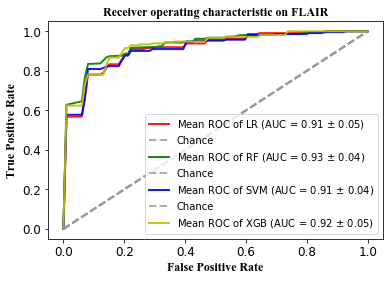

++++++++++++++++++++++the 0th model+++++++++++++++
###############训练集####################
AUC: [0.99087302 0.         0.         0.         0.        ] average: 0.19817460317460317 std: 0.39634920634920634
Accuracy: [0.97368421 0.         0.         0.         0.        ] average: 0.19473684210526315 std: 0.3894736842105263
Specificity: [0.98333333 0.         0.         0.         0.        ] average: 0.19666666666666666 std: 0.39333333333333337
Sensitivity: [0.9702381 0.        0.        0.        0.       ] average: 0.19404761904761905 std: 0.38809523809523816
###############测试集####################
AUC: [0.95408163 0.         0.         0.         0.        ] average: 0.19081632653061226 std: 0.38163265306122457
Accuracy: [0.89285714 0.         0.         0.         0.        ] average: 0.17857142857142858 std: 0.3571428571428571
Specificity: [0.78571429 0.         0.         0.         0.        ] average: 0.15714285714285714 std: 0.3142857142857143
Sensitivity: [0.92857143 0.      

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.metrics import auc,roc_curve,roc_auc_score

lgr = LogisticRegression()
rf = RandomForestClassifier(n_jobs=2, random_state=25,n_estimators=100)
svm = SVC(kernel='linear',probability=True,degree=3, gamma=1.0) #linear
xgb = XGBClassifier(learning_rate=0.3, max_depth=4, eta=0.2)

models = [lgr,rf,svm,xgb]

models_name = ['LR','RF','SVM','XGB']
color = ['r','g','b','y']
n_fold = 5

AUC_train = np.zeros((4, n_fold), dtype=np.float)
Accuracy_train = np.zeros((4, n_fold), dtype=np.float)
Specificity_train = np.zeros((4, n_fold), dtype=np.float)
Sensitivity_train = np.zeros((4, n_fold), dtype=np.float)
F1_score_train =  np.zeros((4, n_fold), dtype=np.float)
AUC_test =  np.zeros((4, n_fold), dtype=np.float)
Accuracy_test = np.zeros((4, n_fold), dtype=np.float)
Specificity_test =  np.zeros((4, n_fold), dtype=np.float)
Sensitivity_test =  np.zeros((4, n_fold), dtype=np.float)
F1_score_test =  np.zeros((4, n_fold), dtype=np.float)

kFold = KFold(n_splits=n_fold, random_state=42, shuffle=True)

fig,ax = plt.subplots()
for index,train_model in enumerate(models):  
    i = 0
    tprs = []
    aucs = []
    CIs = []
    mean_fpr = np.linspace(0, 1, 100)
    for train_index, test_index in kFold.split(X_Flair,Y_data):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
        print("begin to select features")
        X_Flair_train, X_Flair_test, y_train, y_test = X_Flair_data[train_index], X_Flair_data[test_index], Y_data[train_index], Y_data[test_index]
        X_T2_train, X_T2_test, y_train, y_test = X_T2_data[train_index], X_T2_data[test_index], Y_data[train_index], Y_data[test_index]
        X_T1_train, X_T1_test, y_train, y_test = X_T1_data[train_index], X_T1_data[test_index], Y_data[train_index], Y_data[test_index]
        X_T1ce_train, X_T1ce_test, y_train, y_test = X_T1ce_data[train_index], X_T1ce_data[test_index], Y_data[train_index], Y_data[test_index]

        X_Flair_train = pd.DataFrame(X_Flair_train, columns=X_Flair.columns)
        X_T2_train = pd.DataFrame(X_T2_train, columns=X_T2.columns)
        X_T1_train = pd.DataFrame(X_T1_train, columns=X_T1.columns)
        X_T1ce_train = pd.DataFrame(X_T1ce_train, columns=X_T1ce.columns)

        X_Flair_test = pd.DataFrame(X_Flair_test, columns=X_Flair.columns)
        X_T2_test = pd.DataFrame(X_T2_test, columns=X_T2.columns)
        X_T1_test = pd.DataFrame(X_T1_test, columns=X_T1.columns)
        X_T1ce_test = pd.DataFrame(X_T1ce_test, columns=X_T1ce.columns)

        y_train = pd.DataFrame(y_train, columns=Y_T1.columns)
        y_test = pd.DataFrame(y_test, columns=Y_T1.columns)

        ####特征选择方法
        feature_flair = feacture_selection(X_Flair_train,y_train)
        feature_t2 = feacture_selection(X_T2_train,y_train)
        feature_t1 = feacture_selection(X_T1_train,y_train)
        feature_t1ce = feacture_selection(X_T1ce_train,y_train)

        print("the number of feature_flair is ",len(feature_flair),"\n",feature_flair)
        print("the number of feature_t2 is ",len(feature_t2),"\n",feature_t2)
        print("the number of feature_t1 is ",len(feature_t1),"\n",feature_t1)
        print("the number of feature_t1ce is ",len(feature_t1ce),"\n",feature_t1ce)
        mutil_train_data = pd.concat([X_Flair_train[feature_flair],X_T2_train[feature_t2],X_T1_train[feature_t1],X_T1ce_train[feature_t1ce]],axis=1)
        
        final_feature = mRMR_feature_select(mutil_train_data,y_train,20)
       
        mutil_train_data = pd.concat([X_Flair_train[feature_flair],X_T2_train[feature_t2],X_T1_train[feature_t1],X_T1ce_train[feature_t1ce]],axis=1)
        mutil_test_data = pd.concat([X_Flair_test[feature_flair],X_T2_test[feature_t2],X_T1_test[feature_t1],X_T1ce_test[feature_t1ce]],axis=1)
       
        x_smote_train,y_smote_train = smote_augment_data(mutil_train_data[final_feature],y_train)
        
        model =train_model.fit(x_smote_train,y_smote_train )
        ###训练集预测
        y_train_pred_class = model.predict(mutil_train_data[final_feature])
                
        y_train_pred = model.predict_proba(mutil_train_data[final_feature])[:,1]
              
        auc_train,accuracy,specificity,sensitivity,F1_score = evalution_metirc(y_train,y_train_pred,y_train_pred_class,labels=[0,1],target_names=["LGG","HGG"])
        AUC_train[index,i] = auc_train
        Accuracy_train[index,i] = accuracy
        Specificity_train[index,i] = specificity
        Sensitivity_train[index,i] = sensitivity
        F1_score_train[index,i] = F1_score
       
        
        ### 测试集
        y_test_pred_class = model.predict(mutil_test_data[final_feature])             
        y_test_pred = model.predict_proba(mutil_test_data[final_feature])[:,1]
    
        auc_1,accuracy_1,specificity_1,sensitivity_1,F1_score_1 = evalution_metirc(y_test,y_test_pred,y_test_pred_class,labels=[0,1],target_names=["LGG","HGG"])
        AUC_test[index,i] = auc_1
        Accuracy_test[index,i] = accuracy_1
        Specificity_test[index,i] = specificity_1
        Sensitivity_test[index,i] = sensitivity_1   
        F1_score_test[index,i] = F1_score_1  
    
        
        ###绘制ROC 曲线
        fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
        interp_tpr = interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        roc_auc = auc(fpr,tpr)
        tprs.append(interp_tpr)
        aucs.append(roc_auc)
        i = i+1
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color=color[index],
                label=r'Mean ROC of %s (AUC = %0.2f $\pm$ %0.2f)' % (models_name[index], mean_auc, std_auc),
                lw=2, alpha=.9)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                 label=r'$\pm$ 1 std. dev.')
    font1 = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 12
             }
    ax.set_xlabel('False Positive Rate', fontdict=font1)
    ax.set_ylabel('True Positive Rate', fontdict=font1)
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12)
    plt.title(label='Receiver operating characteristic on FLAIR',fontdict=font1)
    # ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    #        title="Receiver operating characteristic on FLAIR")
    ax.legend(loc="lower right")
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color=(0.6, 0.6, 0.6),
            label='Chance', alpha=.8)
    # score, permutation_scores, pvalue = permutation_test_score(
    #     model, X, y, scoring="roc_auc", cv=cv, n_permutations=100, n_jobs=1)
    # print('score:', score, 'permutation_scores:', permutation_scores, 'pvalue:', pvalue)
plt.savefig('ROC_Nulti_ED.png')
plt.show()


for i in range(0,4,1):
    
    print("++++++++++++++++++++++the {}th model+++++++++++++++".format(i))
    print("###############训练集####################")
    print("AUC:",AUC_train[i,:],"average:",np.mean(AUC_train[i,:]),"std:",np.std(AUC_train[i,:]))
    AUCLIST = AUC_train[i,:]
    
    print("Accuracy:",Accuracy_train[i,:],"average:",np.mean(Accuracy_train[i,:]),"std:",np.std(Accuracy_train[i,:]))
    ACCURACYLIST = Accuracy_train[i,:]
    print("Specificity:",Specificity_train[i,:],"average:",np.mean(Specificity_train[i,:]),"std:",np.std(Specificity_train[i,:]))
    SPECIFICITYLIST = Specificity_train[i,:]
    print("Sensitivity:",Sensitivity_train[i,:],"average:",np.mean(Sensitivity_train[i,:]),"std:",np.std(Sensitivity_train[i,:]))
    SENSITIVITYLIST = Sensitivity_train[i,:]
    
    print("###############测试集####################")
    
    print("AUC:",AUC_test[i,:],"average:",np.mean(AUC_test[i,:]),"std:",np.std(AUC_test[i,:]))
    AUCLIST_1 = AUC_test[i,:]
    print("Accuracy:",Accuracy_test[i,:],"average:",np.mean(Accuracy_test[i,:]),"std:",np.std(Accuracy_test[i,:]))
    ACCURACYLIST_1 = Accuracy_test[i,:]
    print("Specificity:",Specificity_test[i,:],"average:",np.mean(Specificity_test[i,:]),"std:",np.std(Specificity_test[i,:]))
    SPECIFICITYLIST_1 = Specificity_test[i,:]
    print("Sensitivity:",Sensitivity_test[i,:],"average:",np.mean(Sensitivity_test[i,:]),"std:",np.std(Sensitivity_test[i,:])) 
    SENSITIVITYLIST_1 = Sensitivity_test[i,:]
    print("F1_score:",F1_score_test[i,:],"average:",np.mean(F1_score_test[i,:]),"std:",np.std(F1_score_test[i,:])) 
    F1_SCORE_LIST = F1_score_test[i,:]